# Setup

## Libraries

In [15]:
# using LinearAlgebra
using SparseArrays
# using Random
using CairoMakie
# using Statistics
# using ProgressMeter
using DataFrames
using DelimitedFiles

In [16]:
include(joinpath(@__DIR__, "..", "Modules/EchoStateNetworks.jl"))
using .EchoStateNetworks
include(joinpath(@__DIR__, "..", "Modules/ONReservoir.jl"))
using .ONReservoir
include(joinpath(@__DIR__, "..", "Modules/TurningError.jl"))
using .TurningError
include(joinpath(@__DIR__, "..", "Modules/TestingFunctions.jl"))
using .TestingFunctions

## Read in Lorenz testing data

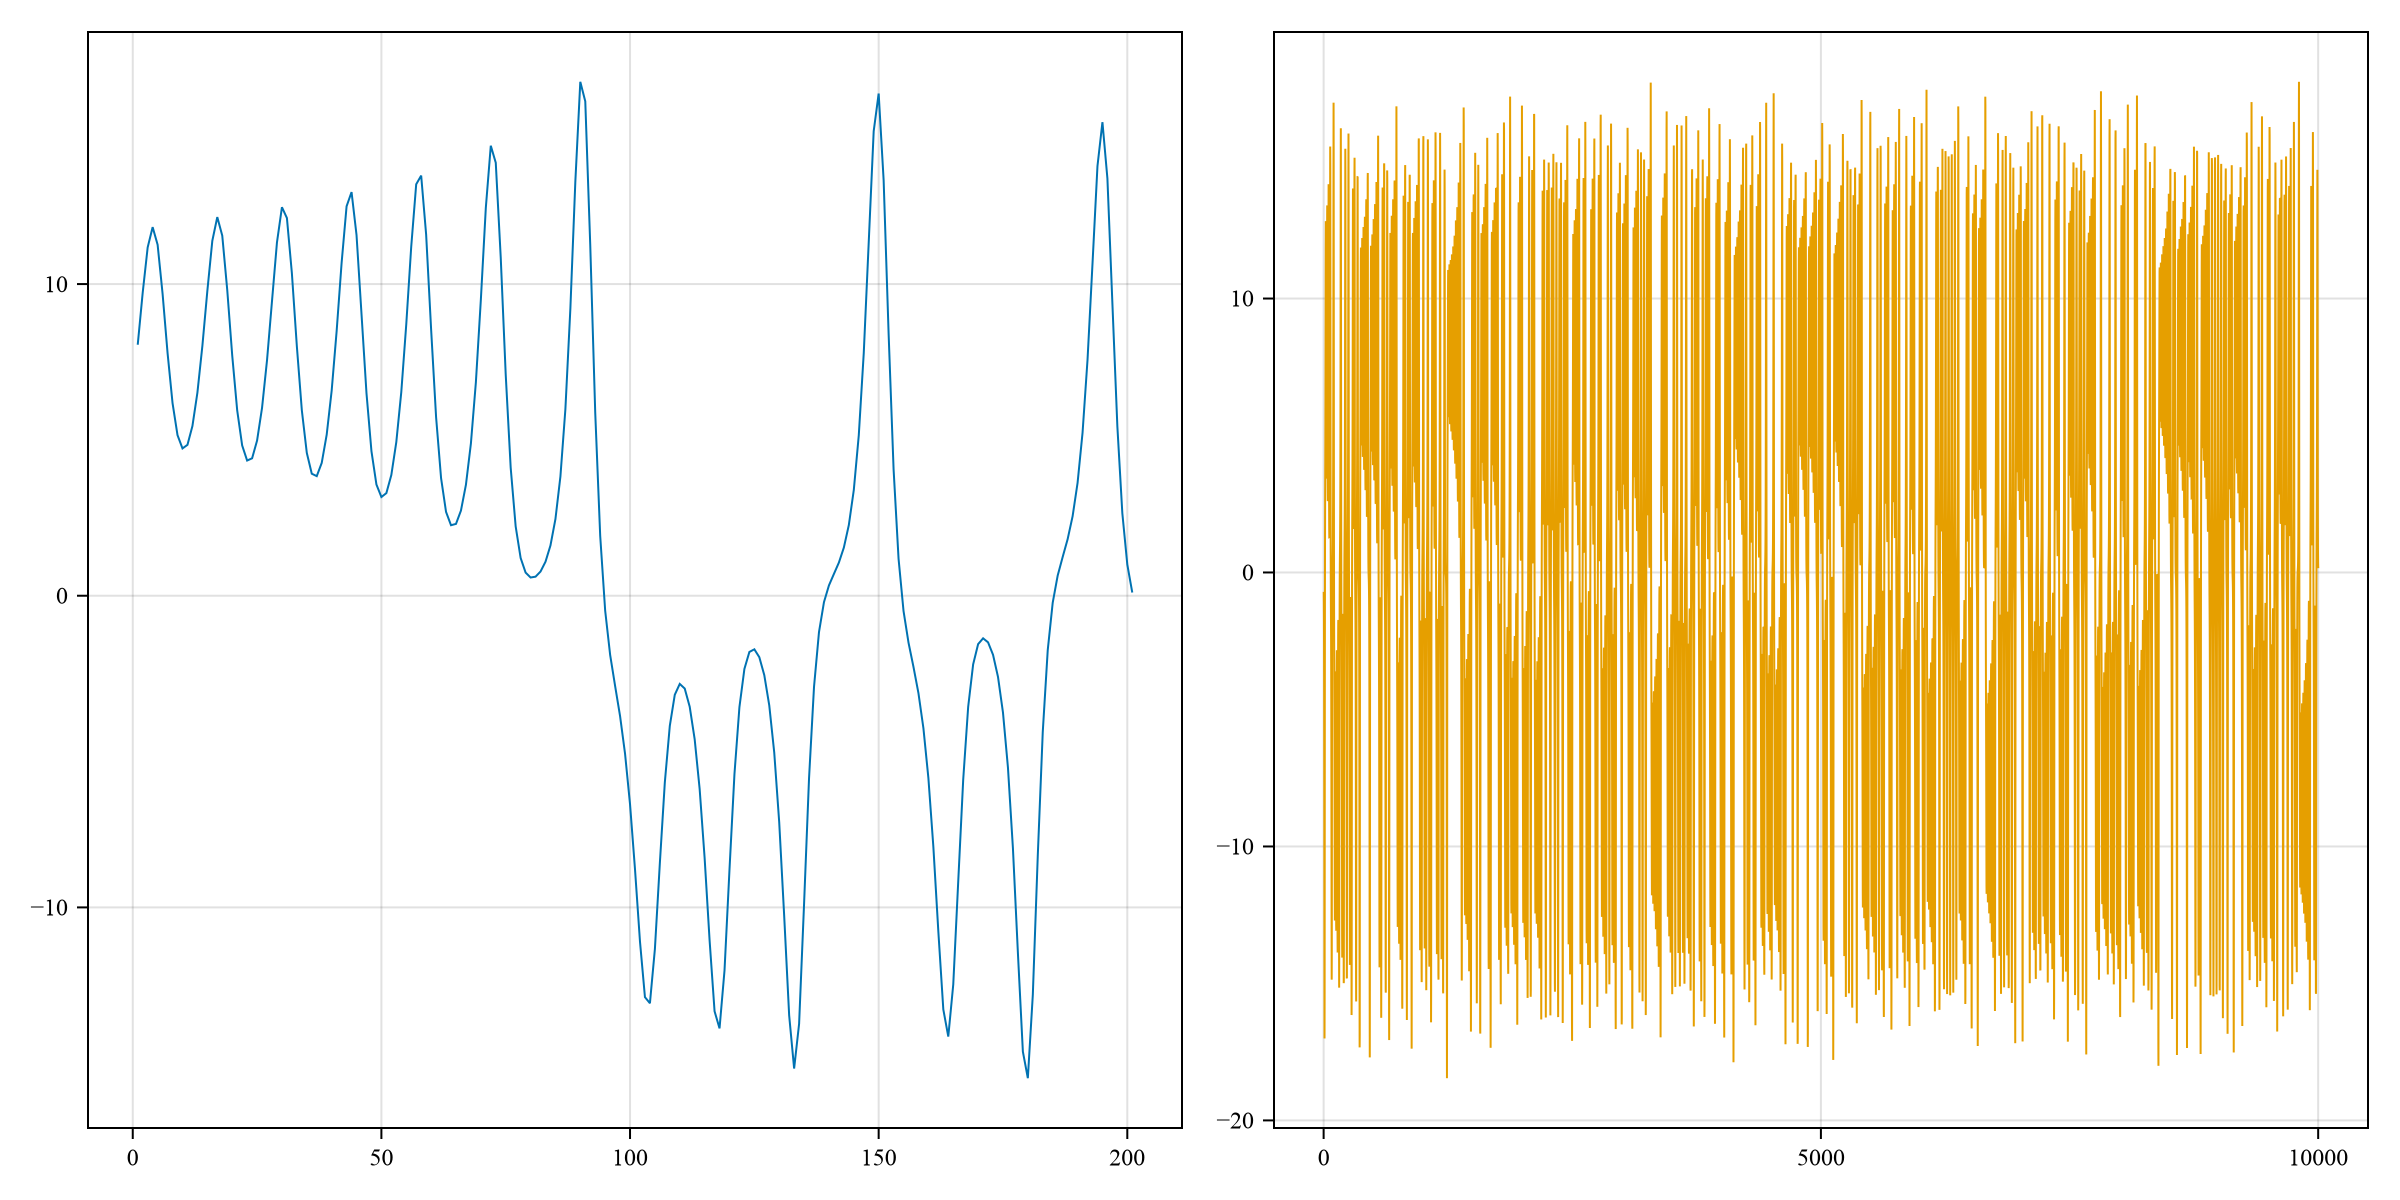

In [18]:
lo_train = vec(readdlm("../Data/lorenz_train_0_05.txt"))
lo_test = vec(readdlm("../Data/lorenz_test_0_05.txt"))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), lo_train[1000:1200]; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), lo_test; linewidth = 1.0, color = Cycled(2))
fig

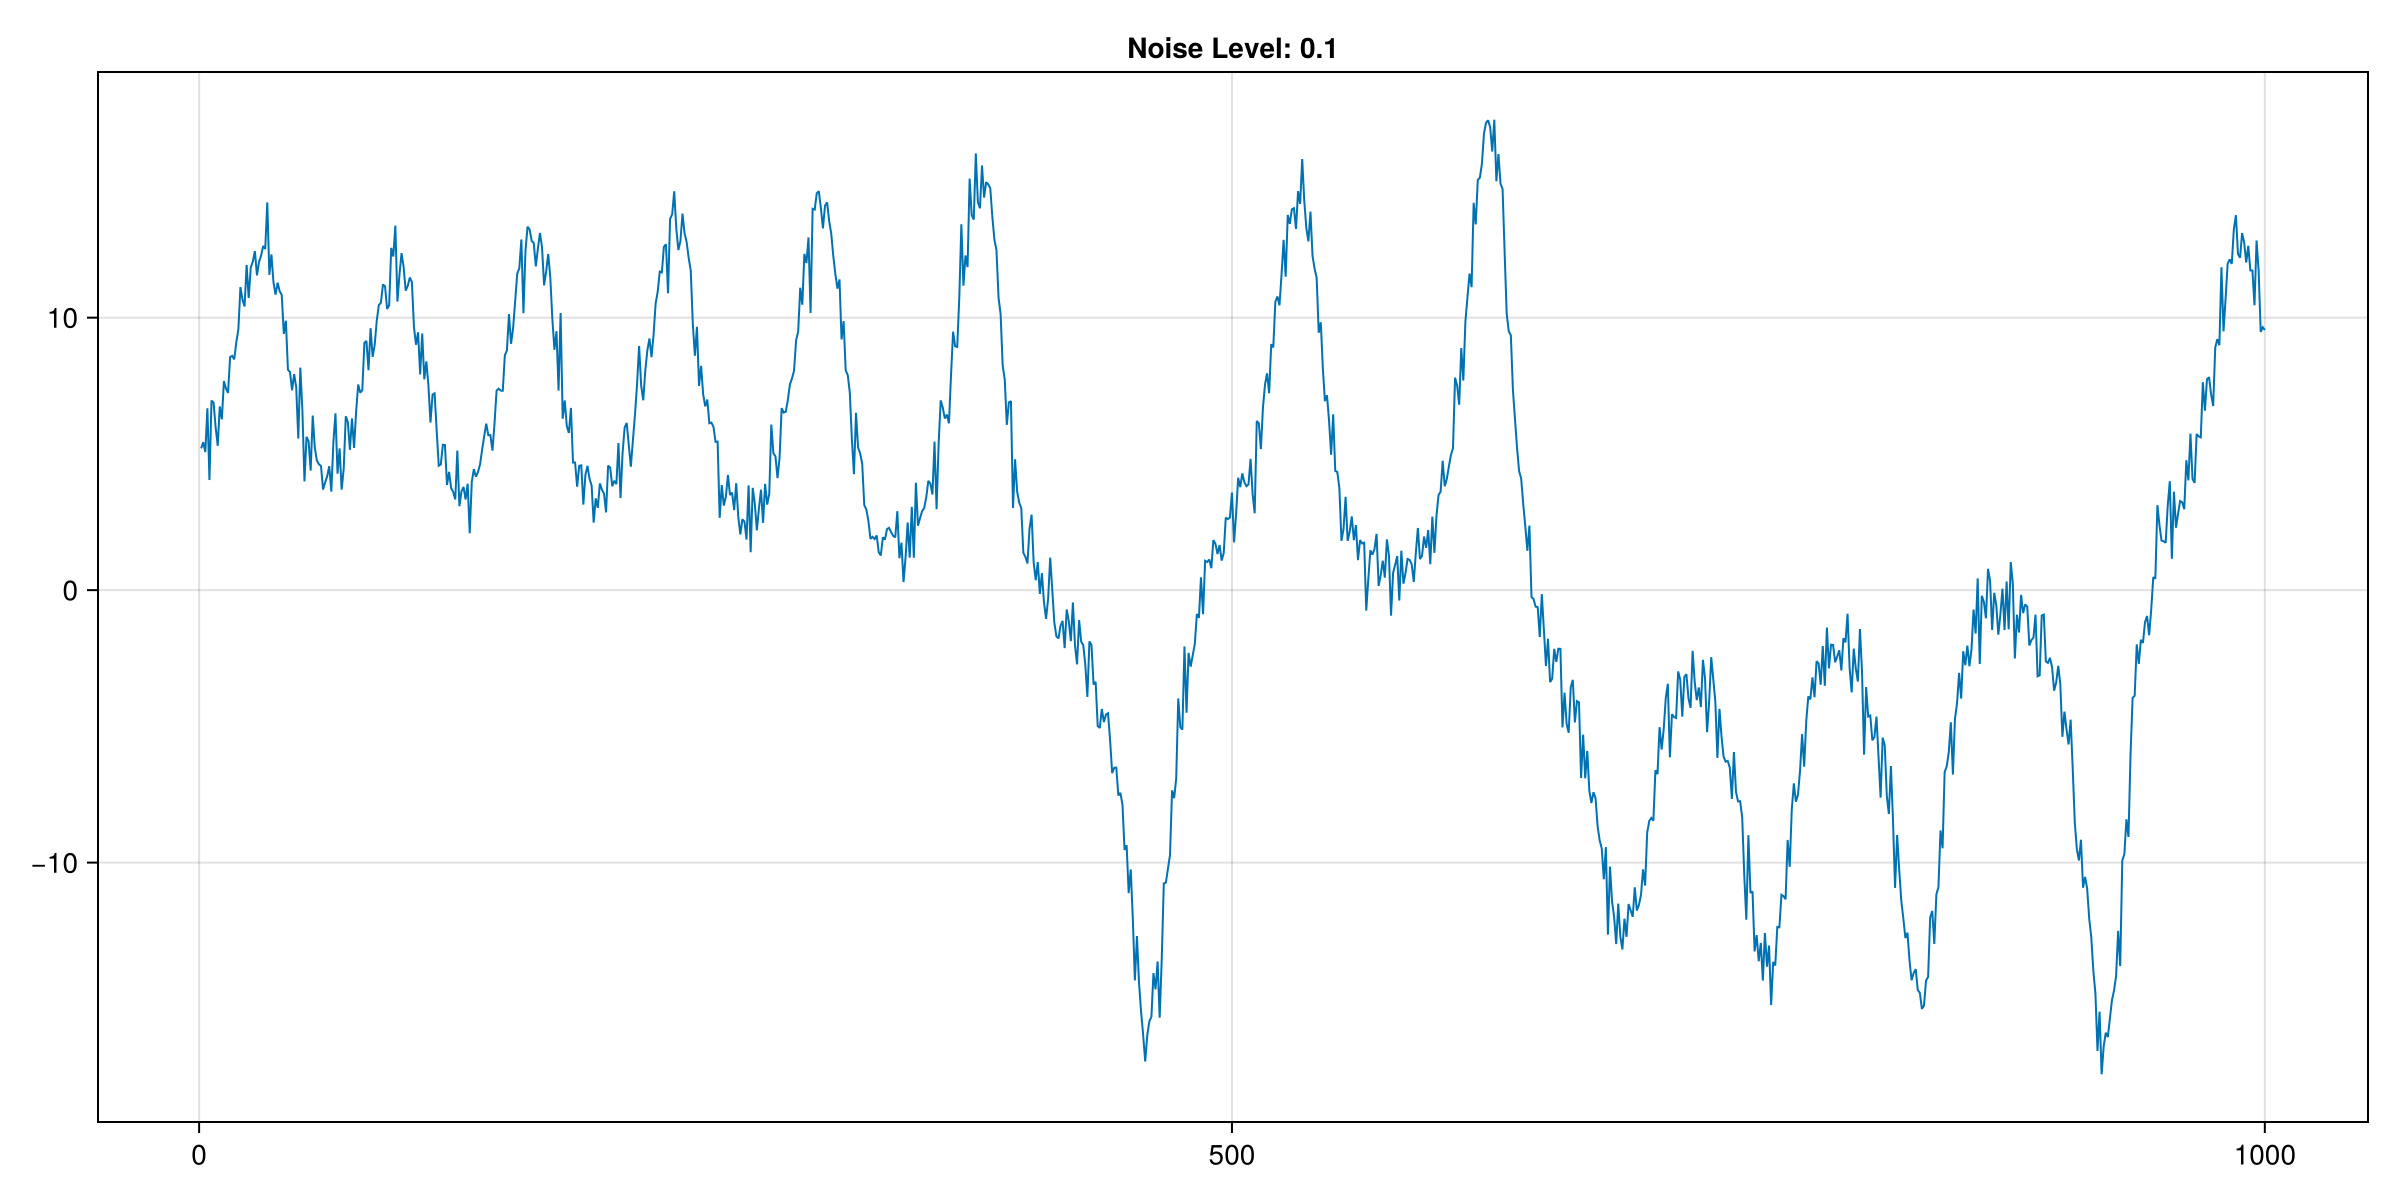

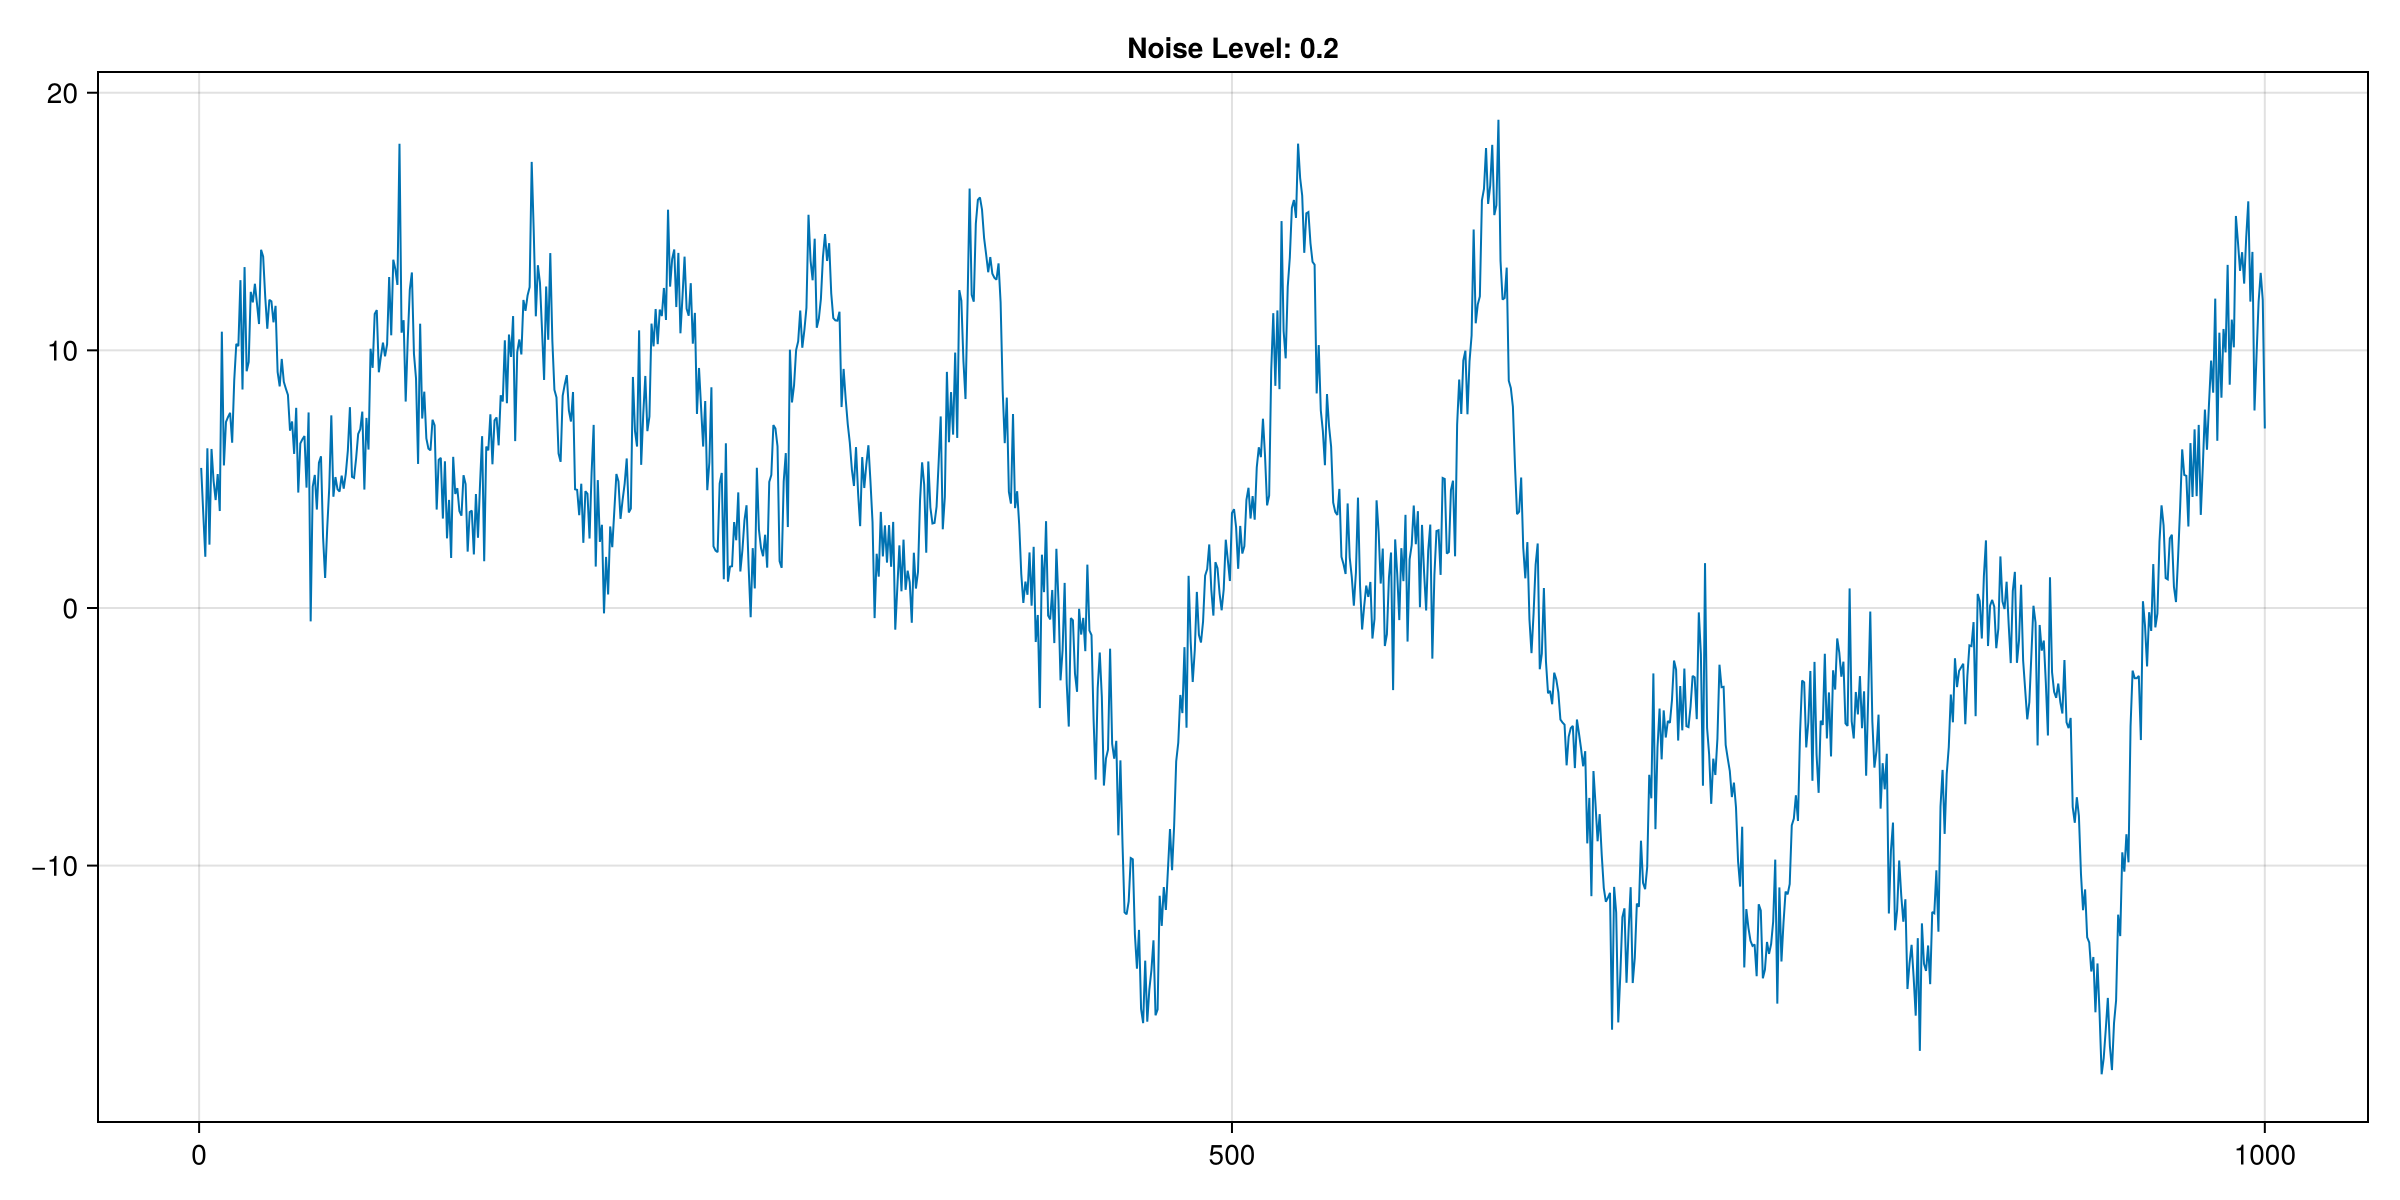

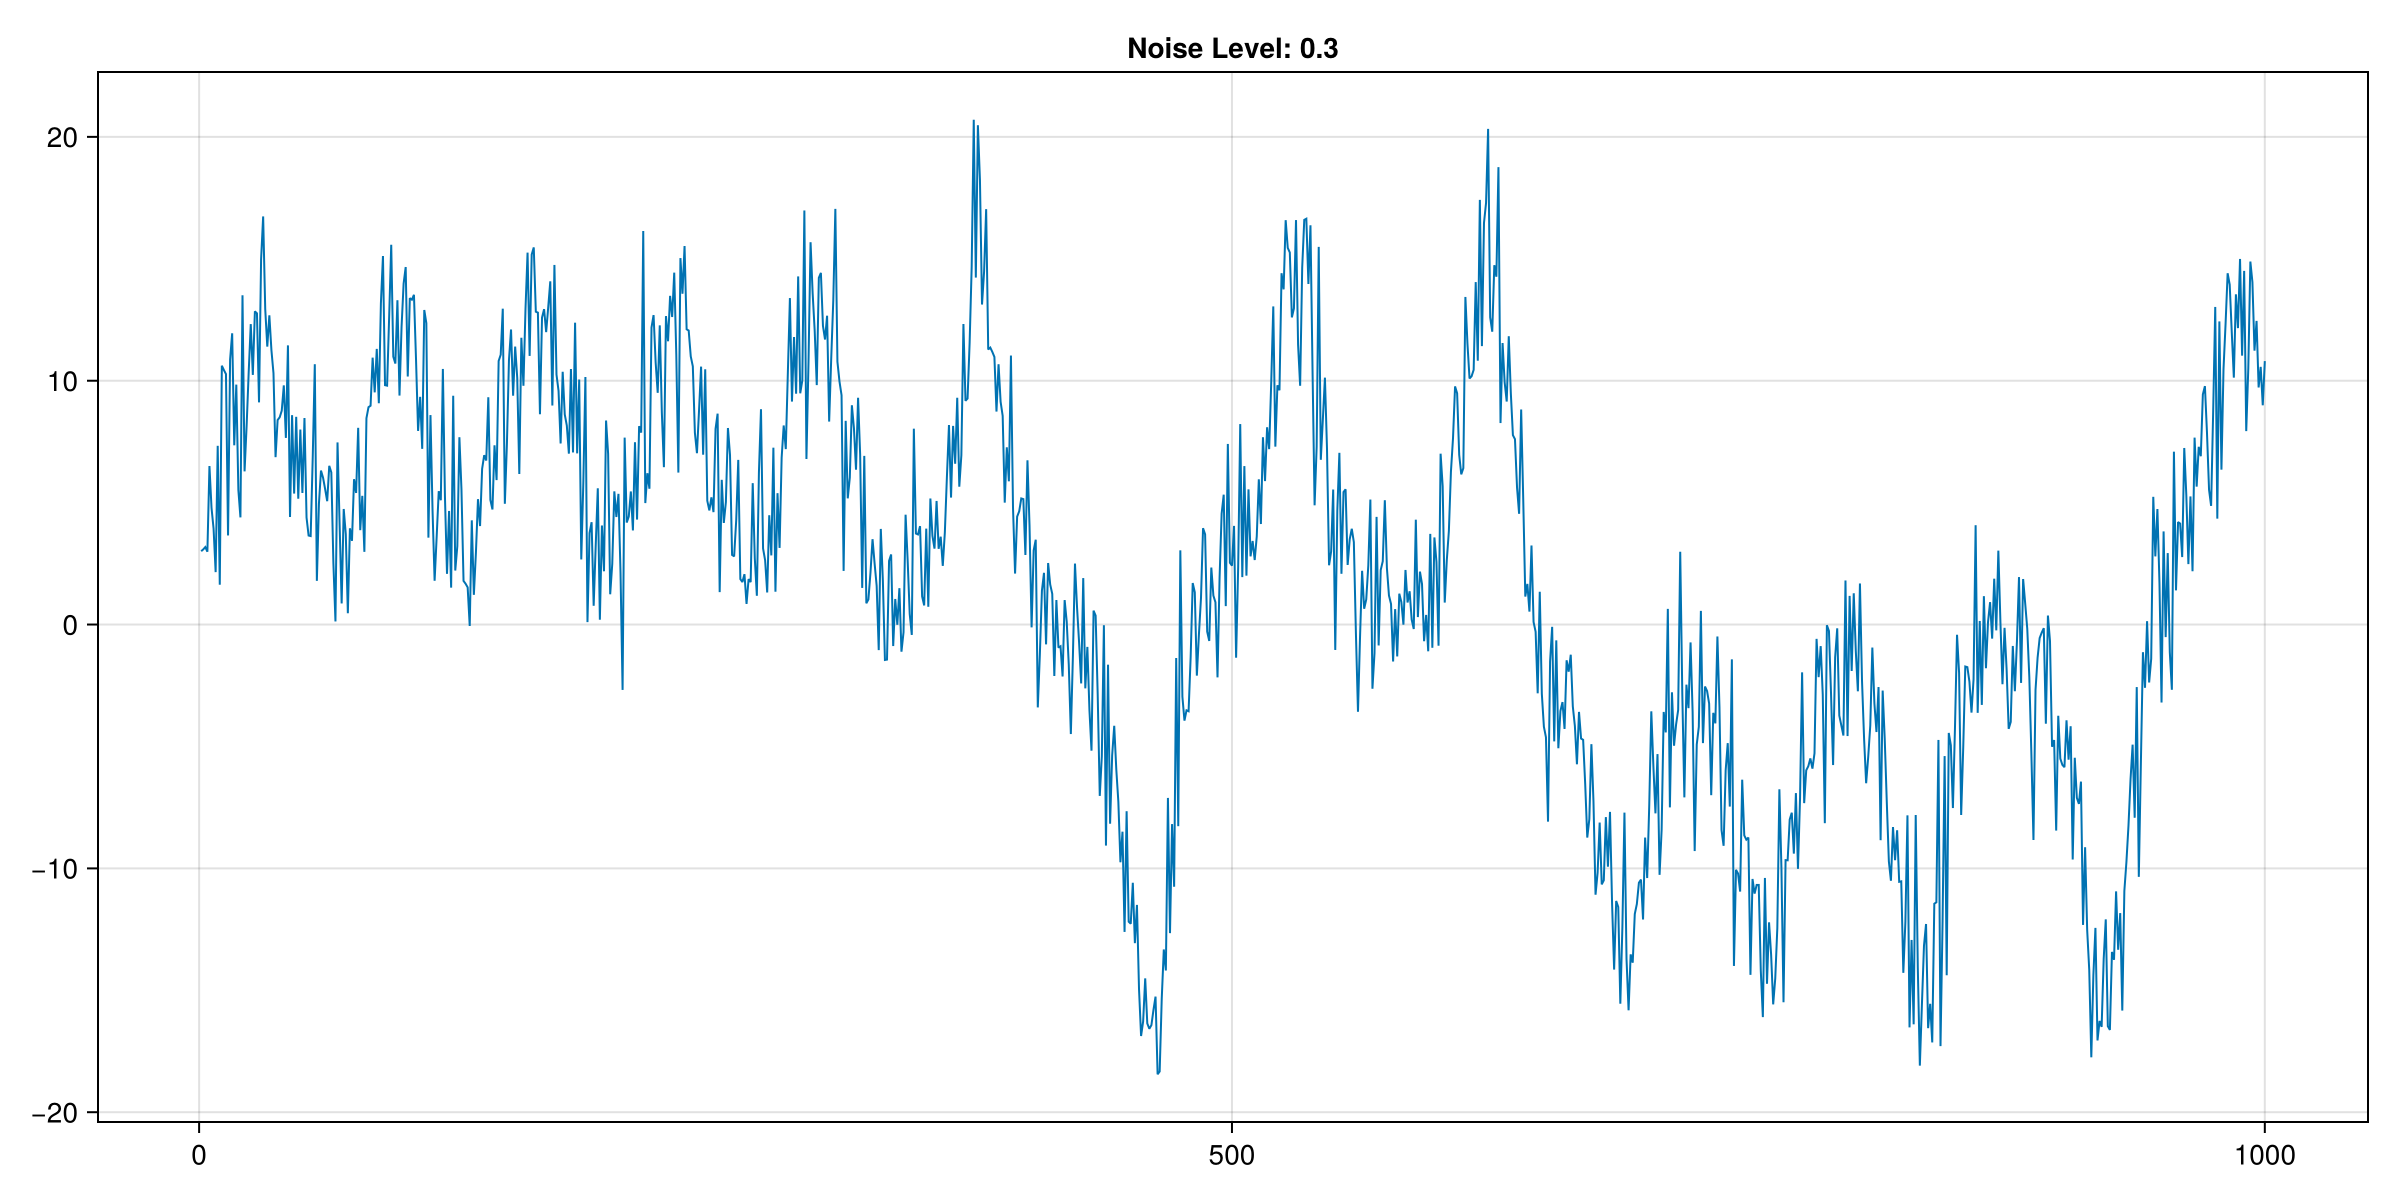

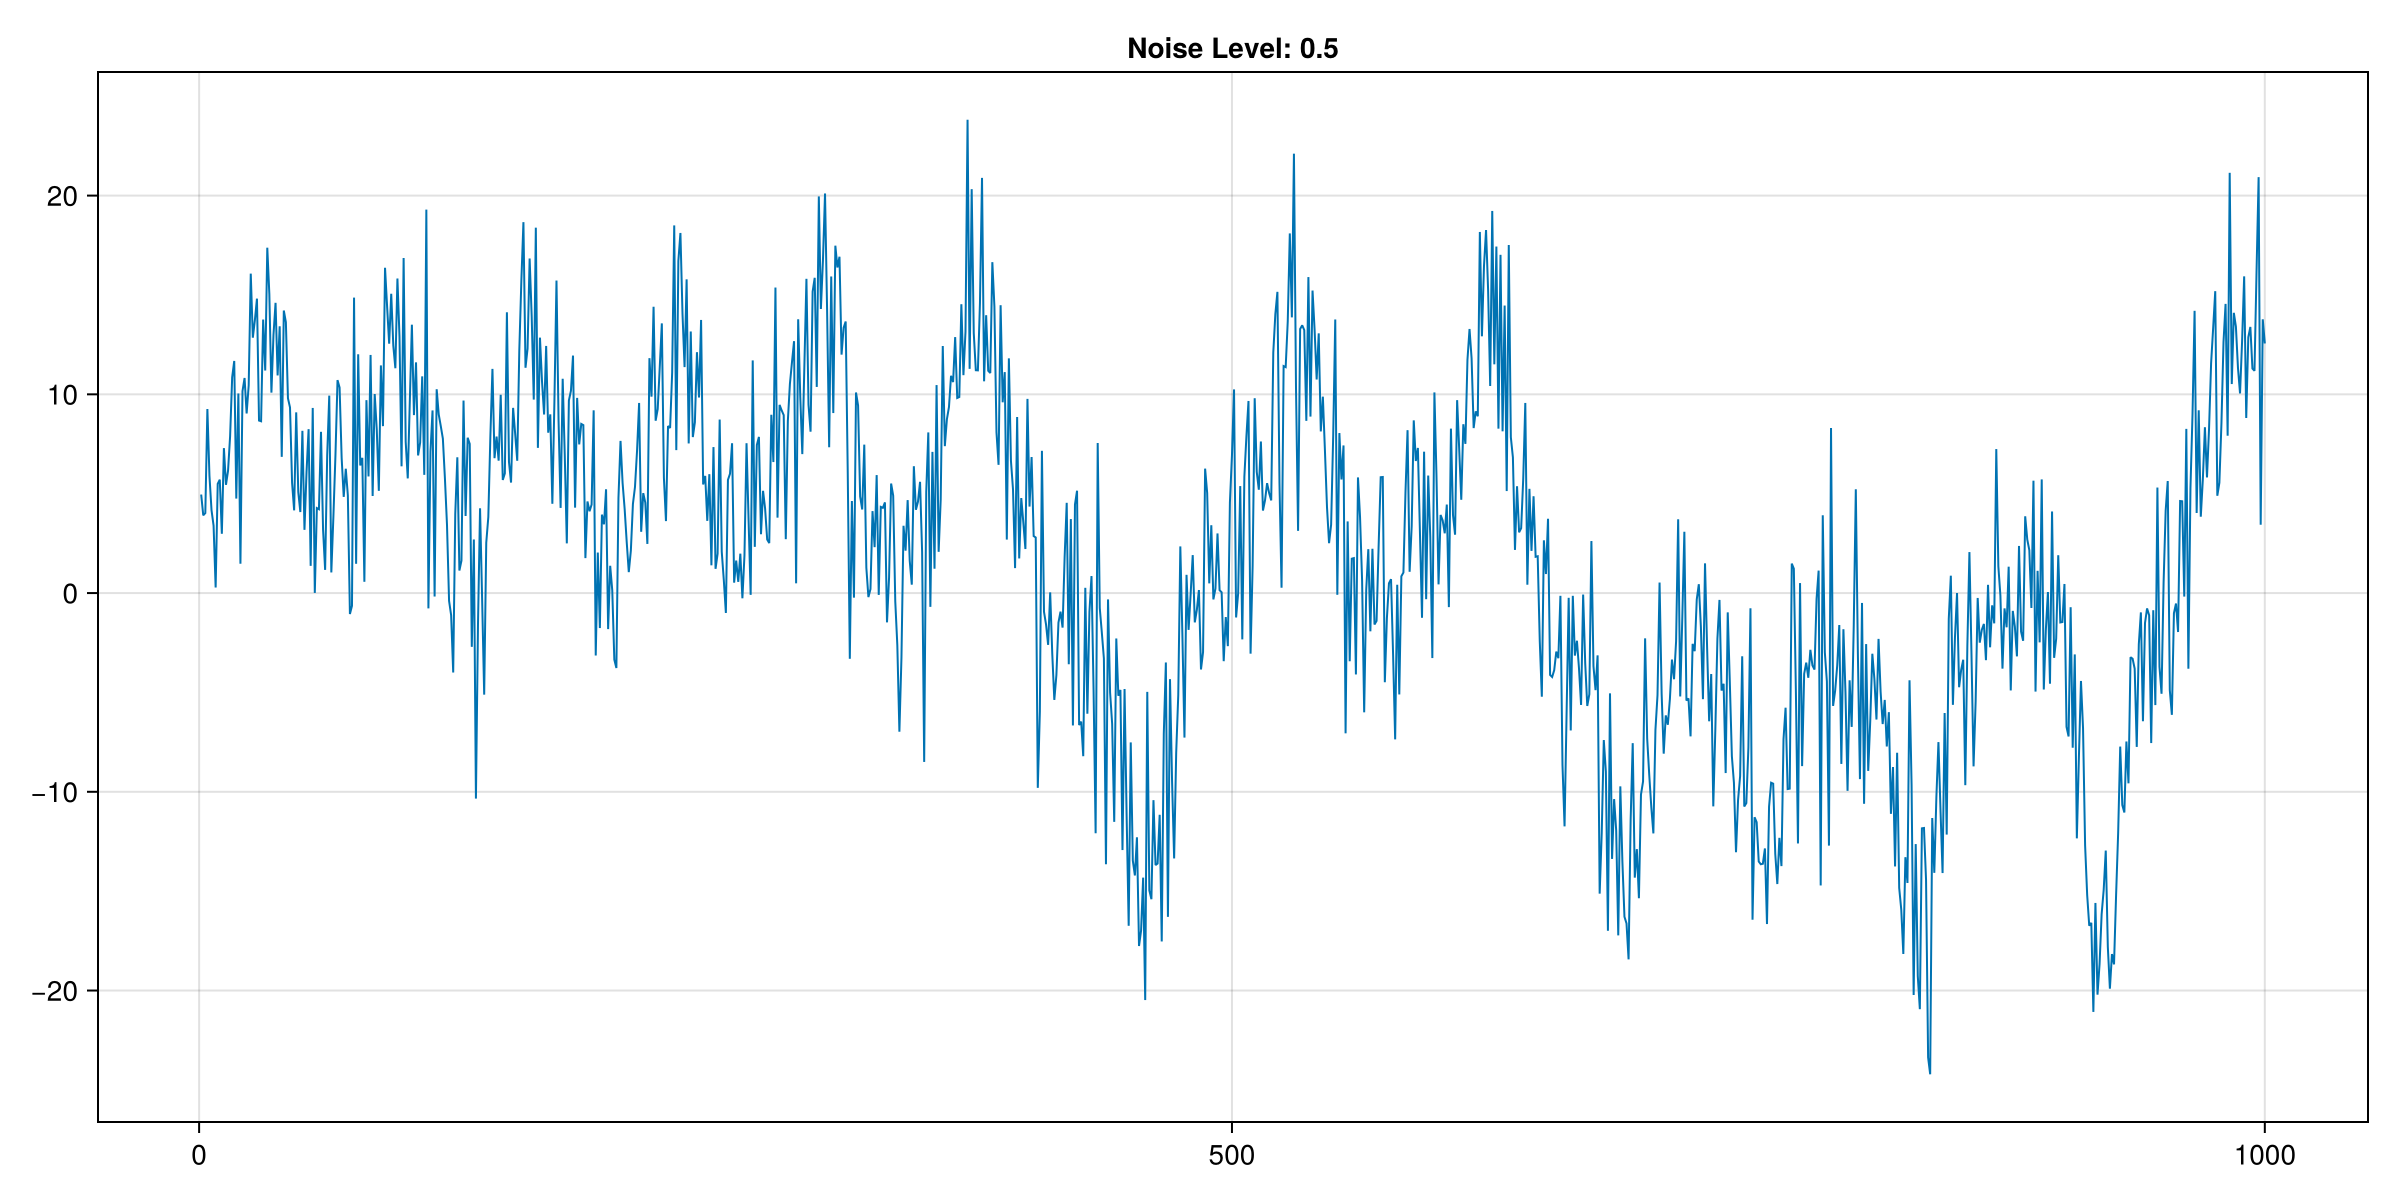

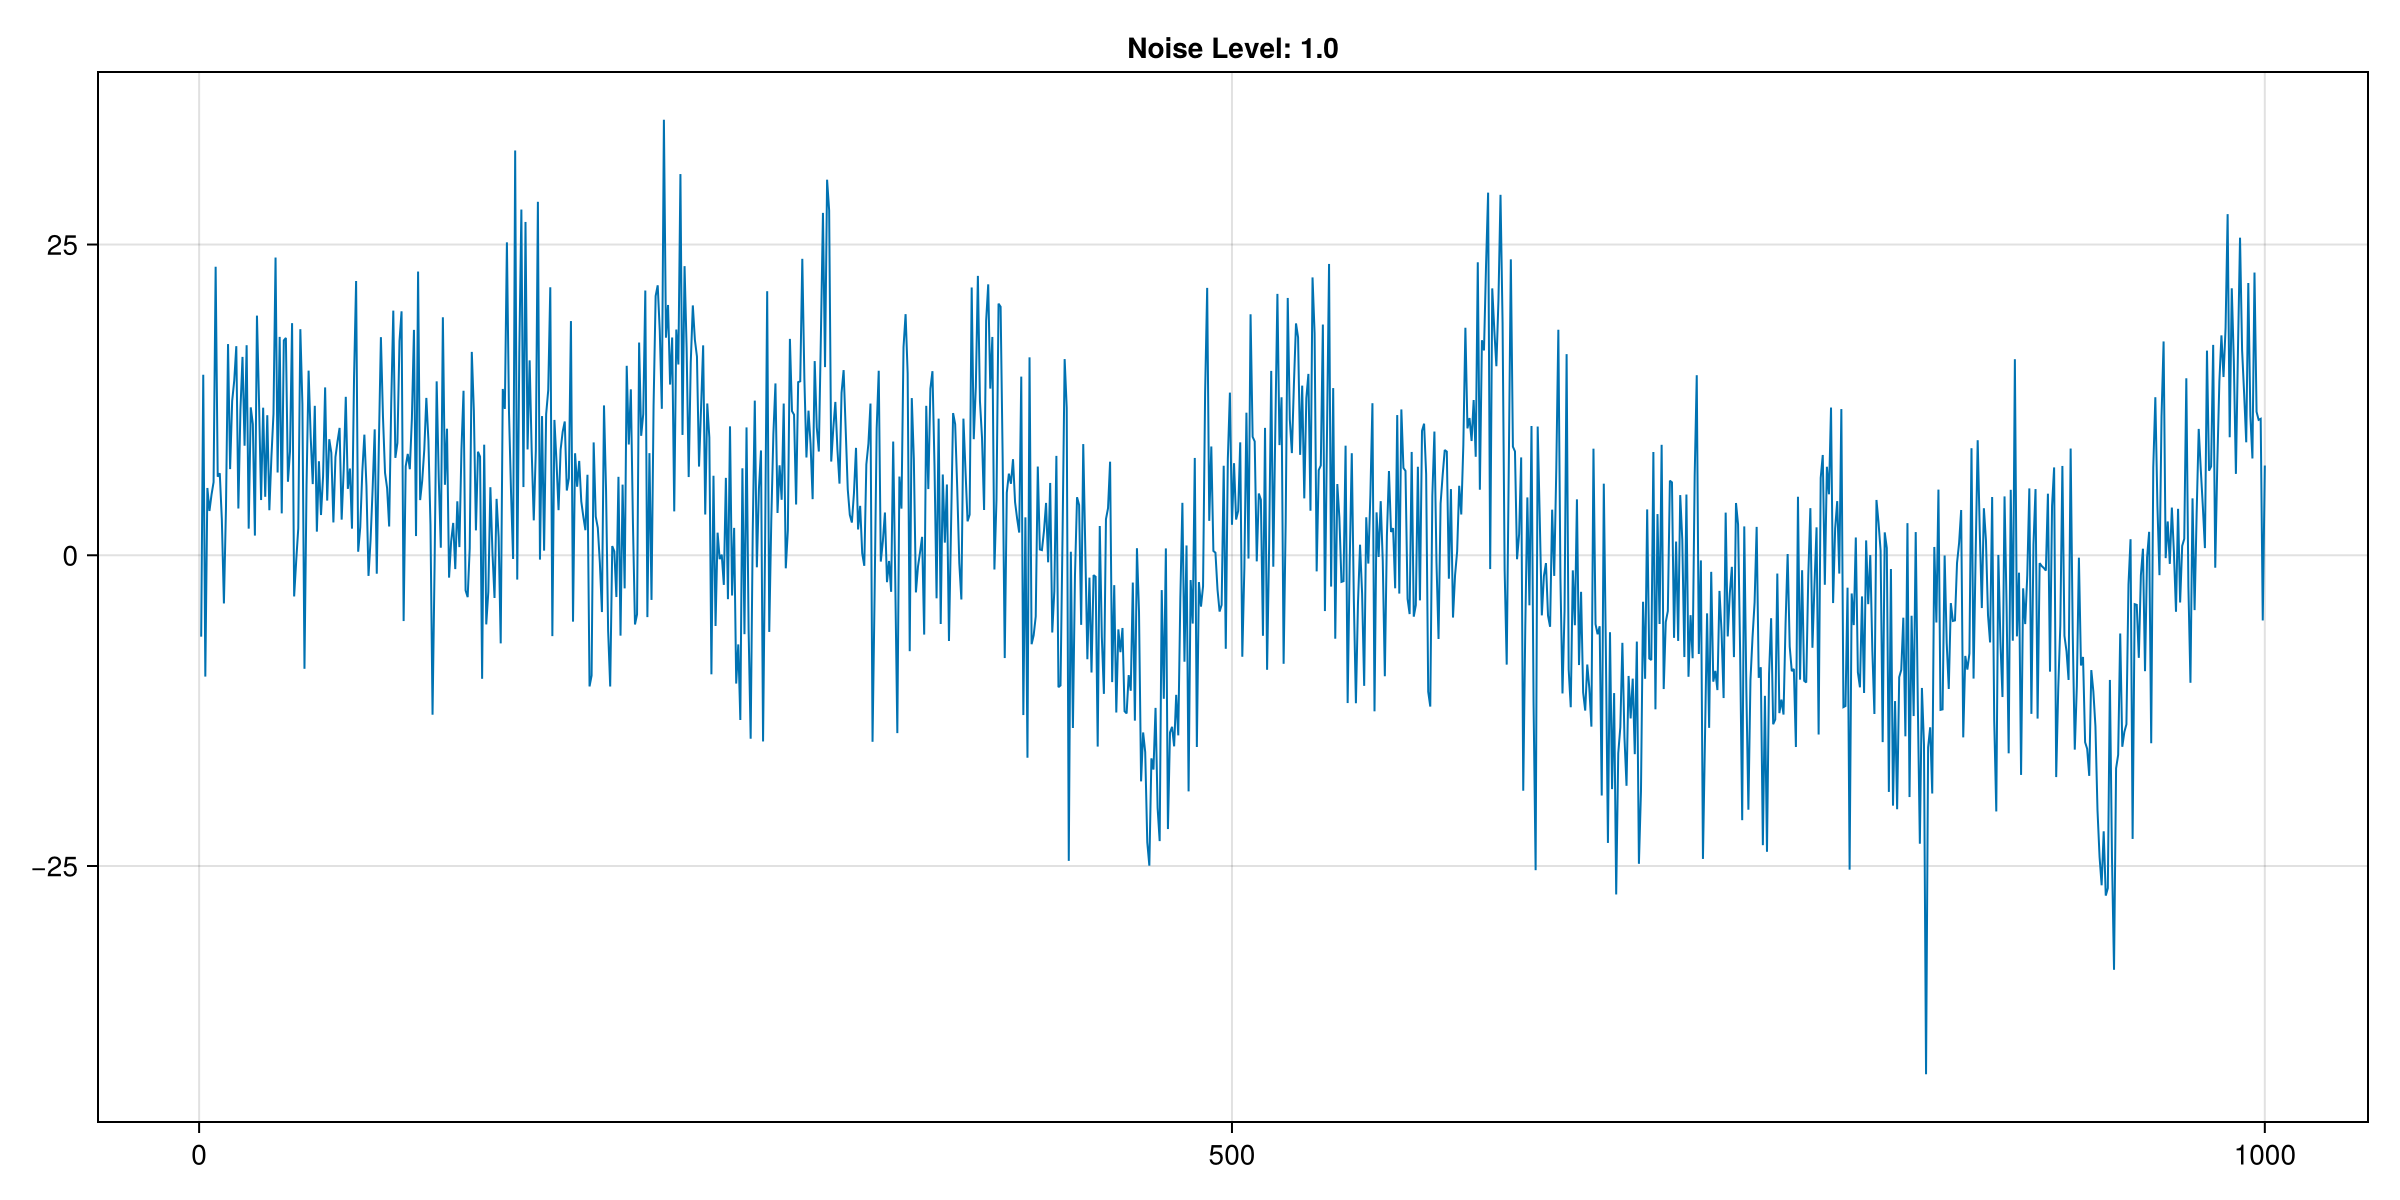

In [30]:

for noise_level in [0.1, 0.2, 0.3, 0.5, 1.0]
    lo_train = add_gaussian_noise(vec(readdlm("../Data/lorenz_train_0_01.txt")), noise_level)
    lo_test = vec(readdlm("../Data/lorenz_test_0_01.txt"))

    fig = Figure( size = (1200,600) )
    lines!(Axis(fig[1,1], title="Noise Level: $noise_level"), lo_train[1:1000]; linewidth = 1.0, color = Cycled(1))
    display(fig)
end

# Read in Rossler testing data

40000
10001


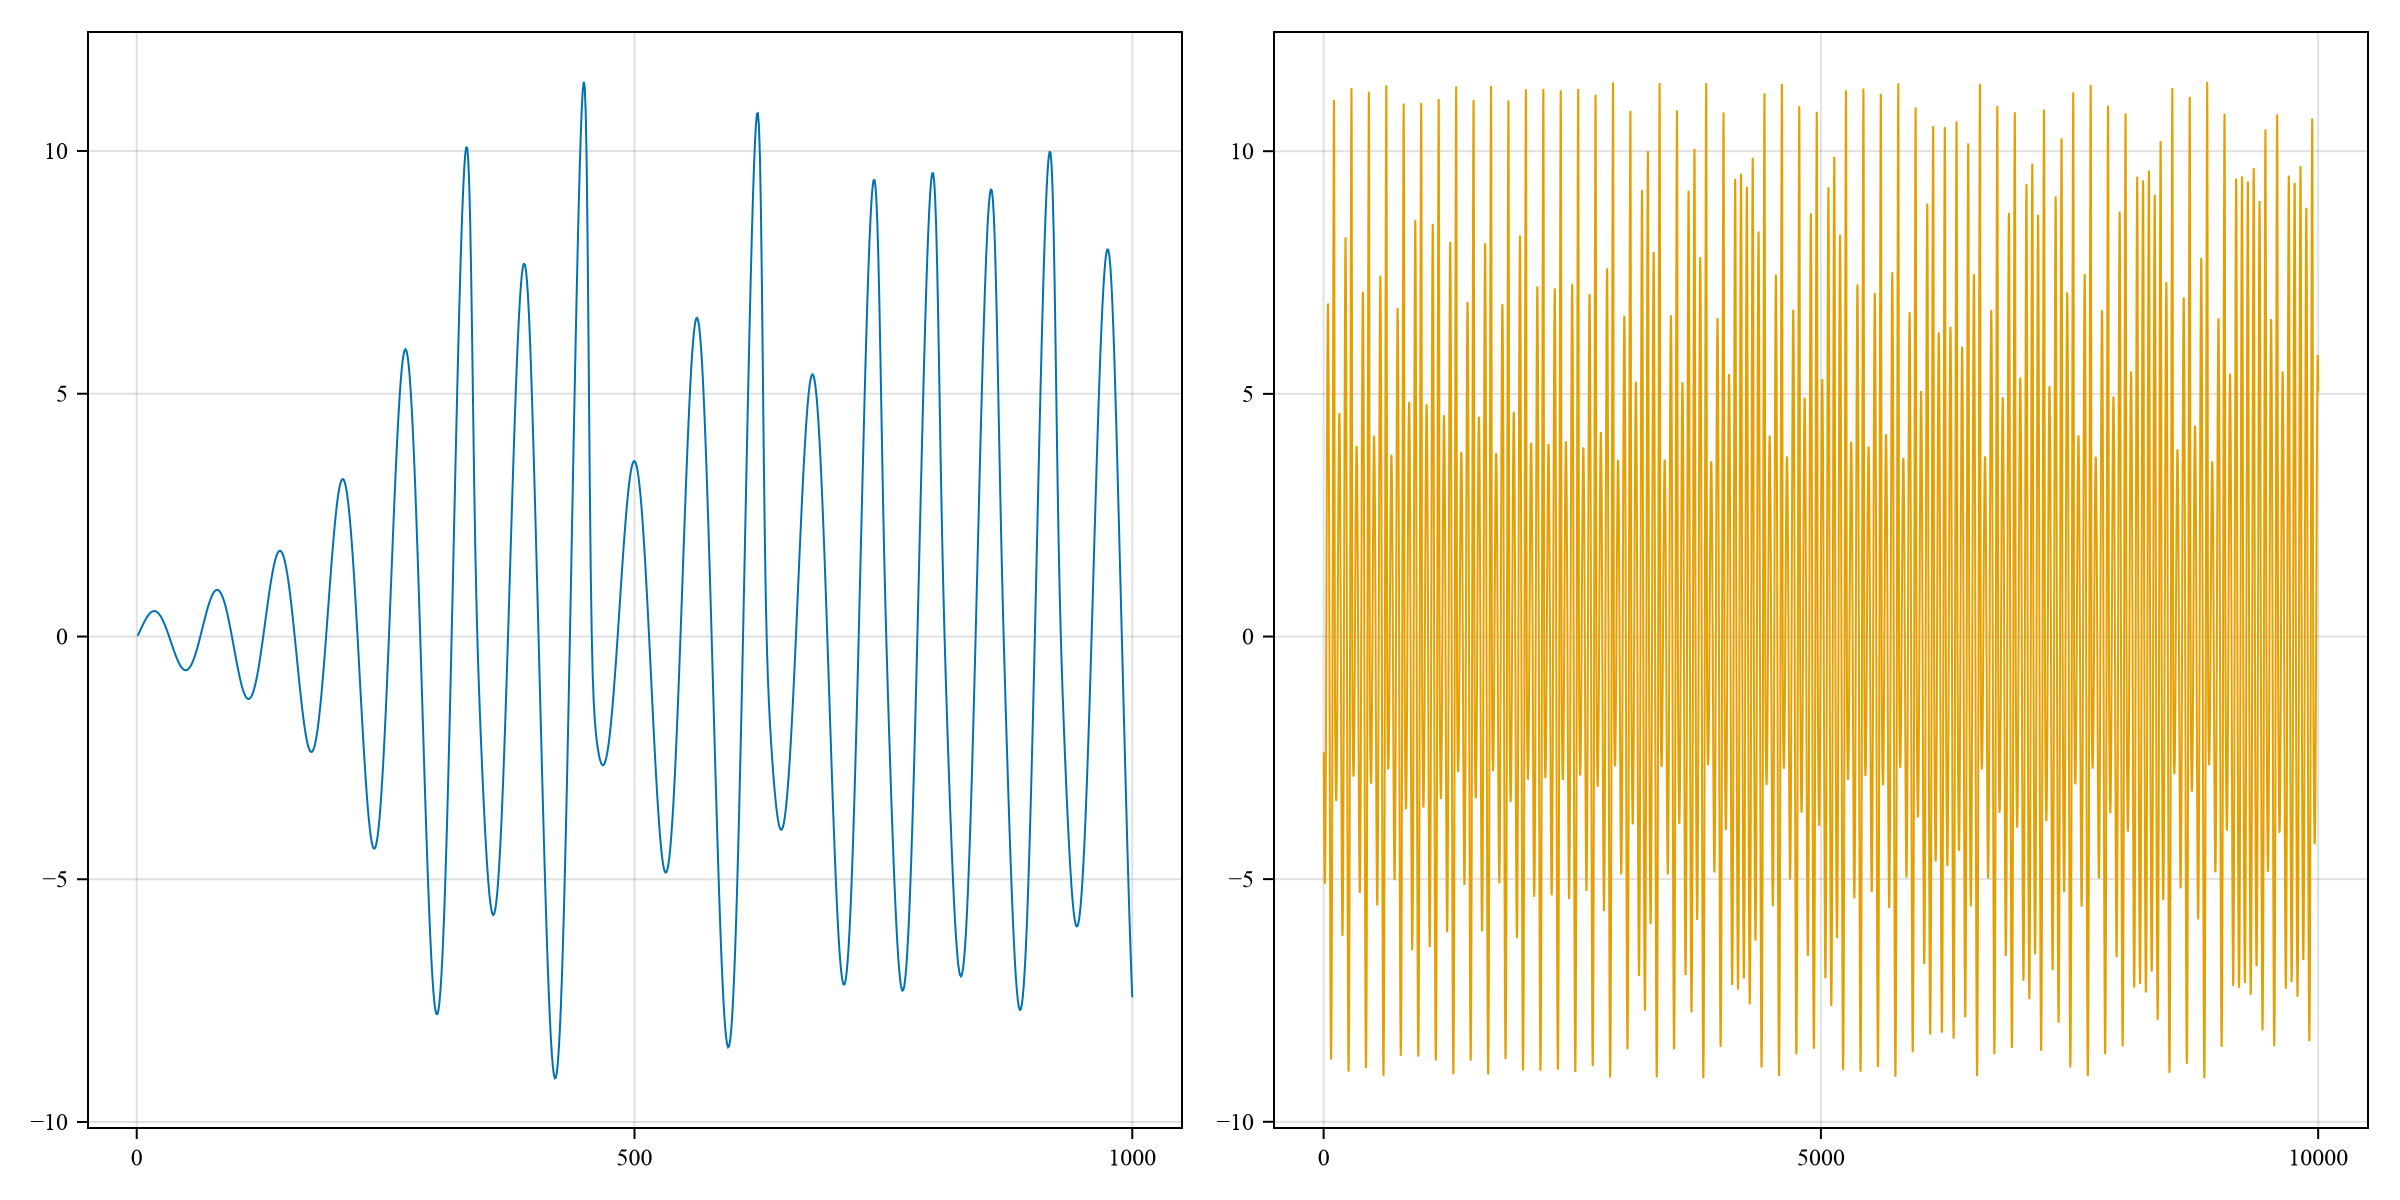

In [7]:
ro_train = vec(readdlm("../Data/rossler_train_0_1.txt"))
ro_test = vec(readdlm("../Data/rossler_test_0_1.txt"))

println(length(ro_train))
println(length(ro_test))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), ro_train[1:1000]; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), ro_test; linewidth = 1.0, color = Cycled(2))
fig

40000
10001


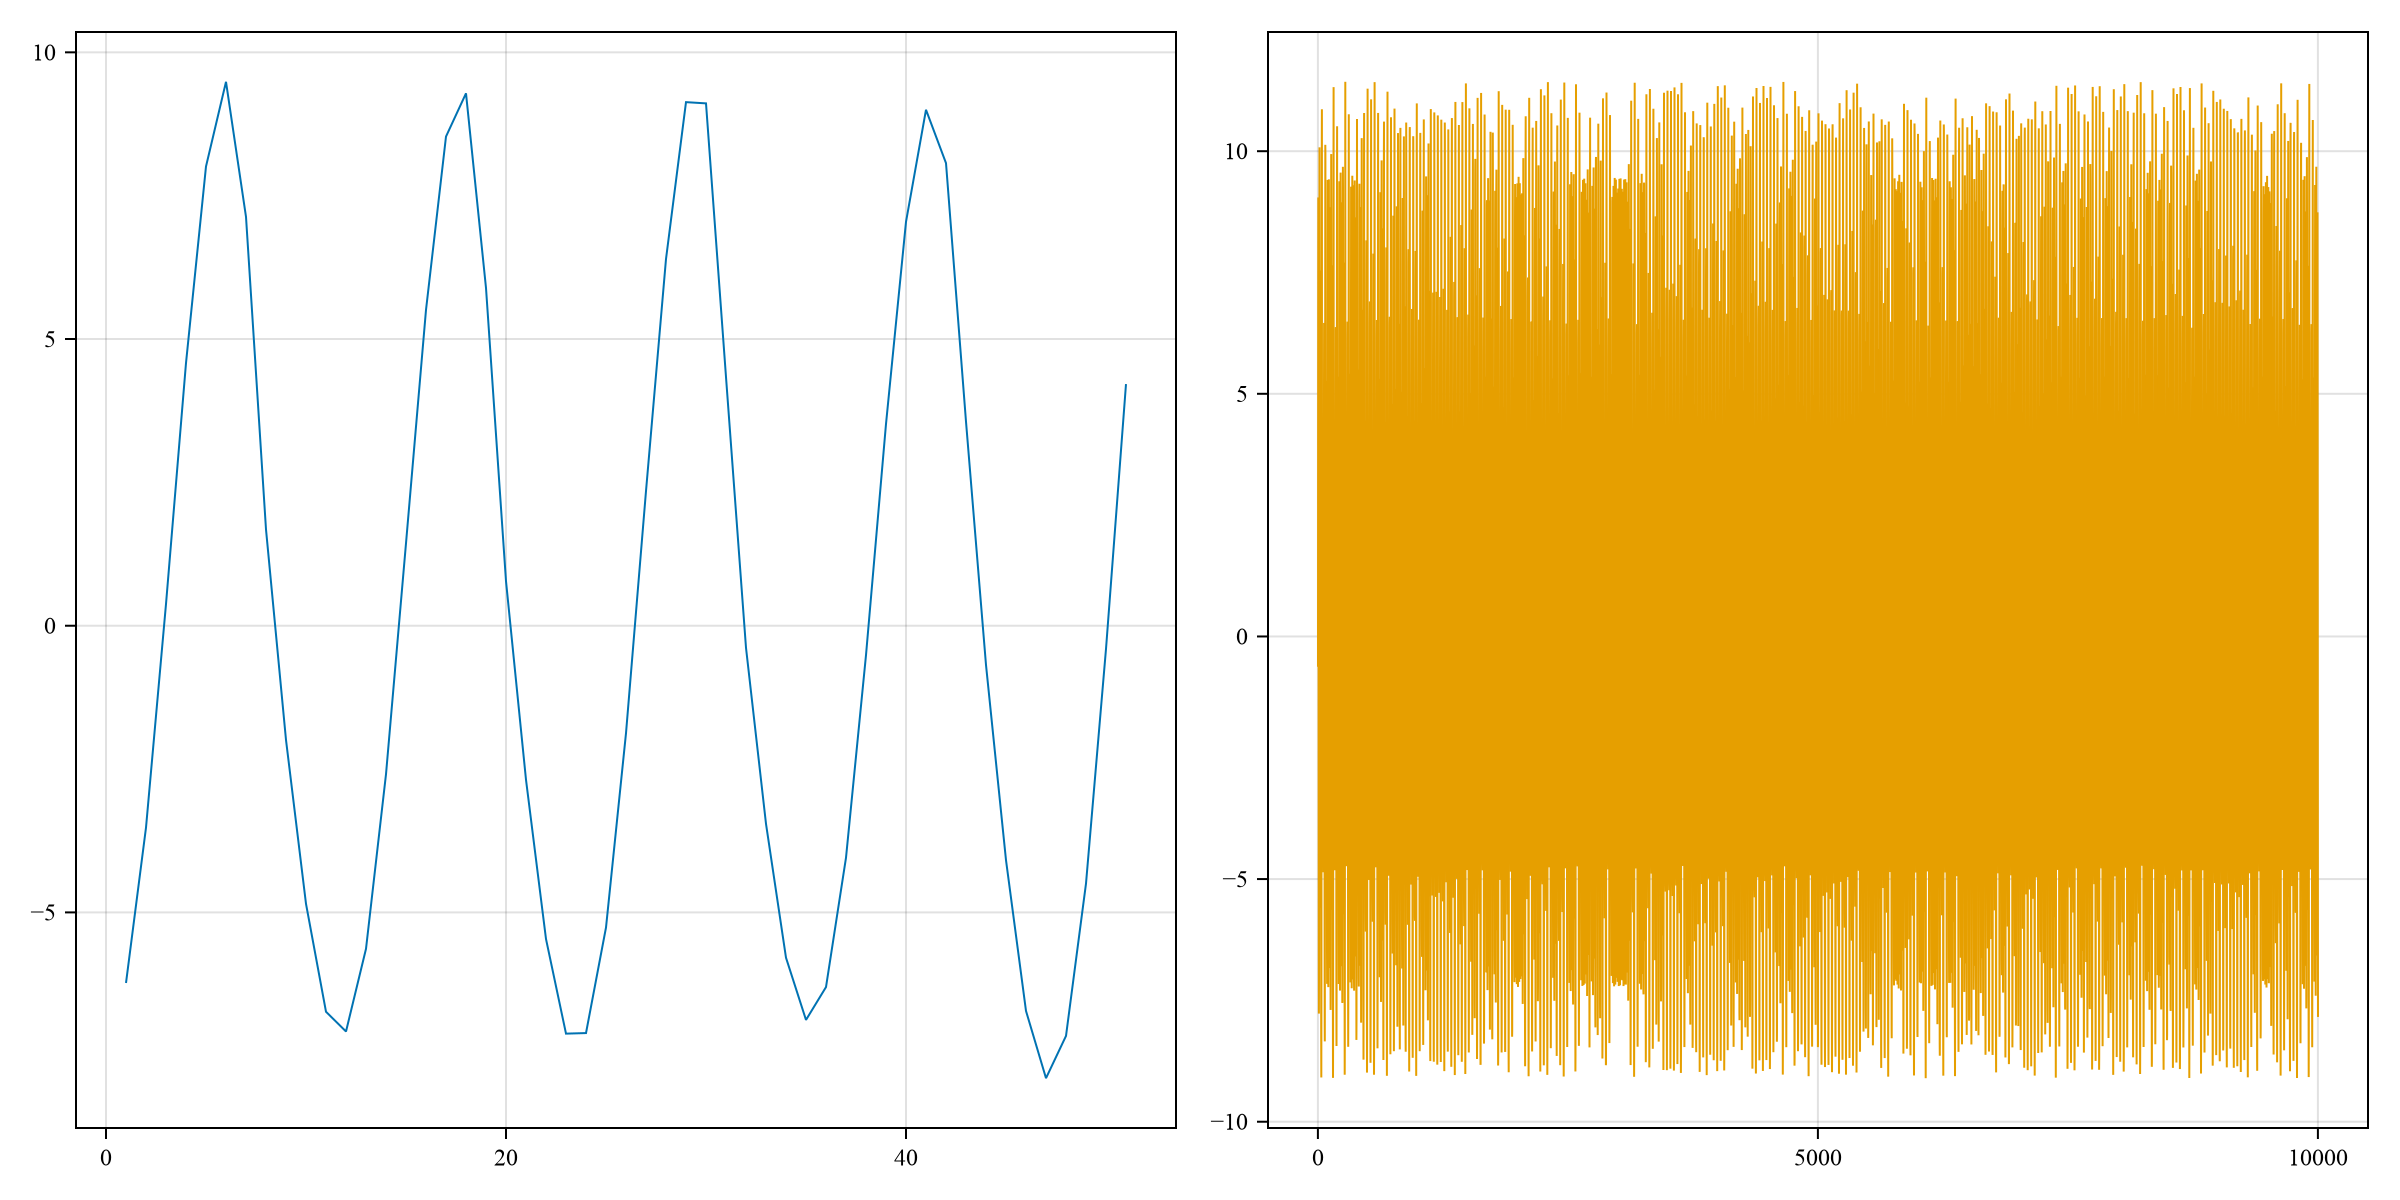

In [19]:
ro_train = vec(readdlm("../Data/rossler_train_0_5.txt"))
ro_test = vec(readdlm("../Data/rossler_test_0_5.txt"))

println(length(ro_train))
println(length(ro_test))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), ro_train[1000:1050]; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), ro_test; linewidth = 1.0, color = Cycled(2))
fig

# Read in Mackey-Glass testing data

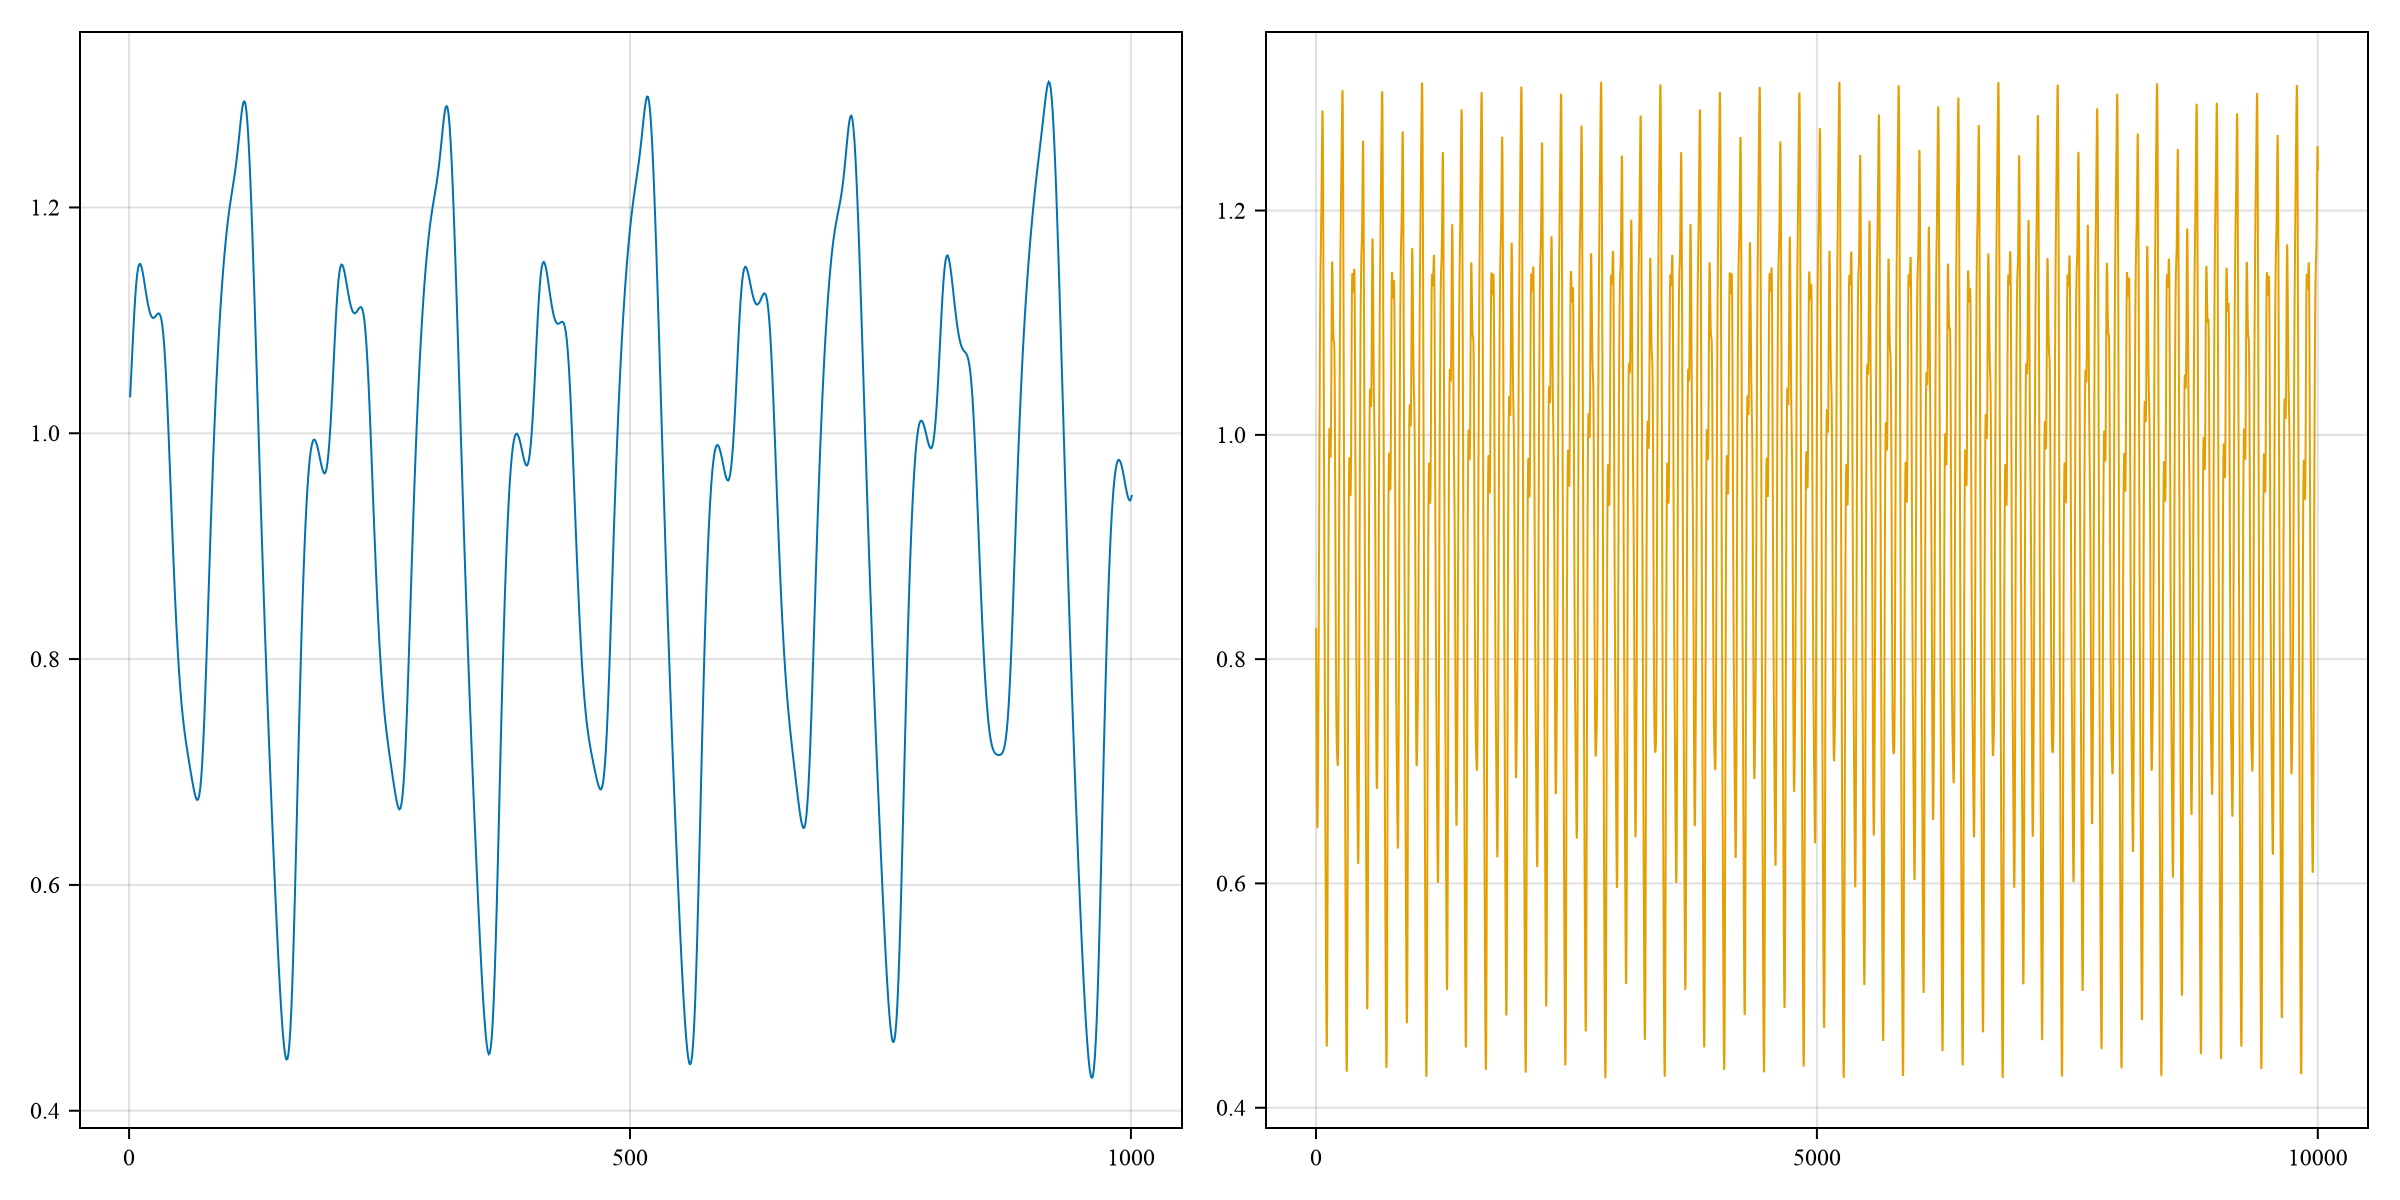

In [11]:
mg_train = vec(readdlm("../Data/mackey_glass_train_0_5.txt"))
mg_test = vec(readdlm("../Data/mackey_glass_test_0_5.txt"))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), mg_train[1000:2000]; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), mg_test; linewidth = 1.0, color = Cycled(2))

fig

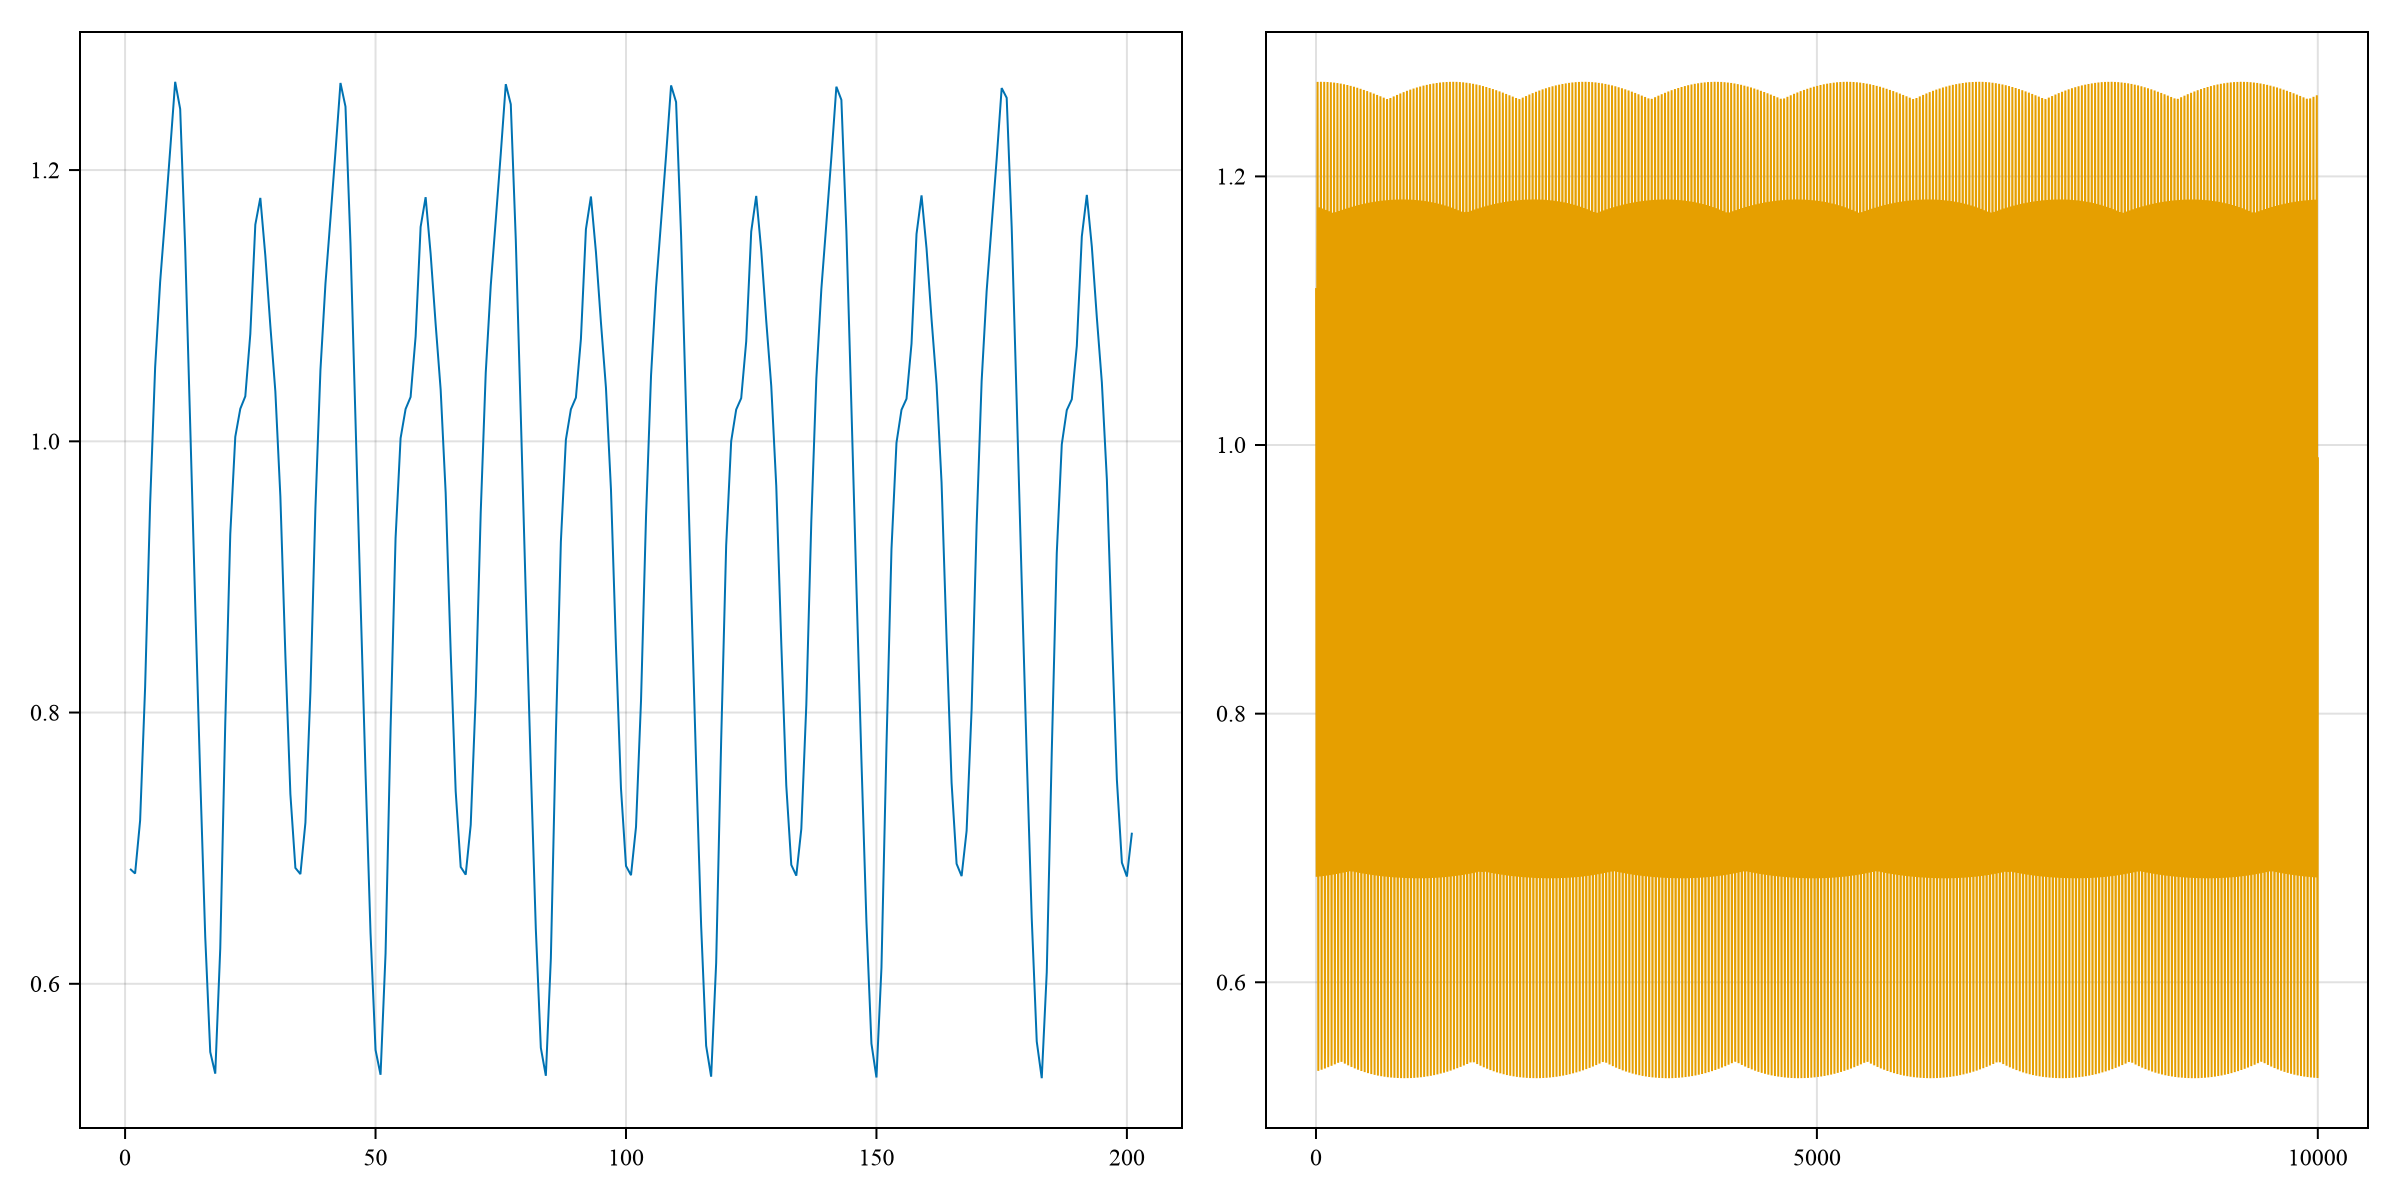

In [13]:
mg_train = vec(readdlm("../Data/mackey_glass_train_2_5.txt"))
mg_test = vec(readdlm("../Data/mackey_glass_test_2_5.txt"))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), mg_train[5000:5200]; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), mg_test; linewidth = 1.0, color = Cycled(2))

fig

# Demonstrations

## Testing ON and reservoir creation

In [7]:
test_ON_part_adjacency = [
    0.7 0.1 0.2;
    0 0.7 0.3;
    0.4 0 0.6
]

k = 8
d = 3
ρ = 2.0
α = 1.0
η = 1/maximum(lo_train)
β = 0.001

ESN_params = create_ESN_params(k, d, ρ, α, η, β, num_partitions=3, ON_part_adjacency=test_ON_part_adjacency)

DataFrame(ESN_params.V_rec, :auto)

24×24 DataFrame
 Row │ x1        x2        x3        x4         x5         x6        x7        ⋯
     │ Float64   Float64   Float64   Float64    Float64    Float64   Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.0       0.831829  0.474841  0.0        0.0        0.0       0.256027  ⋯
   2 │ 0.831829  0.0       0.0       0.0        0.419073   0.026926  0.537867
   3 │ 0.474841  0.0       0.0       0.0        0.0        0.725602  0.0
   4 │ 0.0       0.0       0.0       0.0        0.0337999  0.0       0.0
   5 │ 0.0       0.419073  0.0       0.0337999  0.0        0.0       0.0       ⋯
   6 │ 0.0       0.026926  0.725602  0.0        0.0        0.0       0.0
   7 │ 0.256027  0.537867  0.0       0.0        0.0        0.0       0.0
   8 │ 0.0       0.0       0.0       0.375108   0.0        0.0       0.0
  ⋮  │    ⋮         ⋮         ⋮          ⋮          ⋮         ⋮         ⋮      ⋱
  18 │ 0.0       0.528409  0.0       0.0        0.0        0.0       0.0       ⋯
  19 │ 0.0       0.0       0.528409  0.0        0.0        0.0       0.0
  20 │ 0.0       0.0       0.0       0.528409   0.0        0.0       0.0
  21 │ 0.0       0.0       0.0       0.0        0.528409   0.0       0.0
  22 │ 0.0       0.0       0.0       0.0        0.0        0.528409  0.0       ⋯
  23 │ 0.0       0.0       0.0       0.0        0.0        0.0       0.528409
  24 │ 0.0       0.0       0.0       0.0        0.0        0.0       0.0
                                                   17 columns and 9 rows omitted

In [8]:
m = 3
k = 4
part_connection=0.5
d = k*0.05
ρ = 1.2
α = 1.0
η = 1/maximum(lo_train)
β = 0.001
w = 1
τ = 2

window_size = (m-1)*τ
    
part_symbols_train, unique_partitions_train = create_ordinal_partition(lo_train, m, w, τ)
trans_adjacency_matrix = create_transition_matrix(part_symbols_train)
num_partitions = length(unique_partitions_train)
# trans_adjacency_map = trans_adjacency_matrix_to_map(trans_adjacency_matrix, num_partitions)

ESN_params = create_ESN_params(k, d, ρ, α, η, β, num_partitions=num_partitions, ON_part_adjacency=trans_adjacency_matrix)

R, train_states = train_one_step_pred(lo_train, ESN_params, partition_symbols=part_symbols_train)


part_symbols_test, unique_partitions_test = create_ordinal_partition(lo_test, m, w, τ, unique_partitions=unique_partitions_train)
preds, test_states = one_step_pred(lo_test, ESN_params, R, S = train_states[end,:], partition_symbols=part_symbols_test)

MethodError: MethodError: no method matching train_one_step_pred(::Vector{Float64}, ::ESNParameters; partition_symbols::Vector{Union{Nothing, Int64}})

Closest candidates are:
  train_one_step_pred(::Any, ::Any, !Matched::Any; partition_symbols, R_delay)
   @ Main.EchoStateNetworks ~/Desktop/Uni/Honours Research/echo-state-networks/Modules/EchoStateNetworks.jl:166


In [9]:
trans_adjacency_matrix

6×6 Matrix{Float64}:
 0.174419  0.16415   0.173966  0.172002  0.153277  0.162187
 0.172317  0.169208  0.162398  0.16299   0.162546  0.17054
 0.160199  0.170467  0.170014  0.161558  0.168655  0.169108
 0.153672  0.167848  0.169356  0.172221  0.172975  0.163927
 0.172906  0.174094  0.155823  0.154783  0.178996  0.163399
 0.15953   0.167521  0.162244  0.171592  0.173402  0.165712

In [10]:
DataFrame(ESN_params.V_rec, :auto)

24×24 DataFrame
 Row │ x1        x2        x3        x4        x5        x6        x7        x ⋯
     │ Float64   Float64   Float64   Float64   Float64   Float64   Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.0       0.0       0.0       0.0       0.230301  0.0       0.0       0 ⋯
   2 │ 0.0       0.0       0.0       0.0       0.0       0.230301  0.0       0
   3 │ 0.0       0.0       0.0       0.0       0.0       0.0       0.230301  0
   4 │ 0.0       0.0       0.0       0.0       0.0       0.0       0.0       0
   5 │ 0.241759  0.0       0.0       0.0       0.0       0.0       0.0       0 ⋯
   6 │ 0.0       0.241759  0.0       0.0       0.0       0.0       0.0       0
   7 │ 0.0       0.0       0.241759  0.0       0.0       0.0       0.0       0
   8 │ 0.0       0.0       0.0       0.241759  0.0       0.0       0.0       0
  ⋮  │    ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        ⋱
  18 │ 0.0       0.242585  0.0       0.0       0.0       0.244252  0.0       0 ⋯
  19 │ 0.0       0.0       0.242585  0.0       0.0       0.0       0.244252  0
  20 │ 0.0       0.0       0.0       0.242585  0.0       0.0       0.0       0
  21 │ 0.223819  0.0       0.0       0.0       0.235031  0.0       0.0       0
  22 │ 0.0       0.223819  0.0       0.0       0.0       0.235031  0.0       0 ⋯
  23 │ 0.0       0.0       0.223819  0.0       0.0       0.0       0.235031  0
  24 │ 0.0       0.0       0.0       0.223819  0.0       0.0       0.0       0
                                                   17 columns and 9 rows omitted

## Demonstration of turning point error

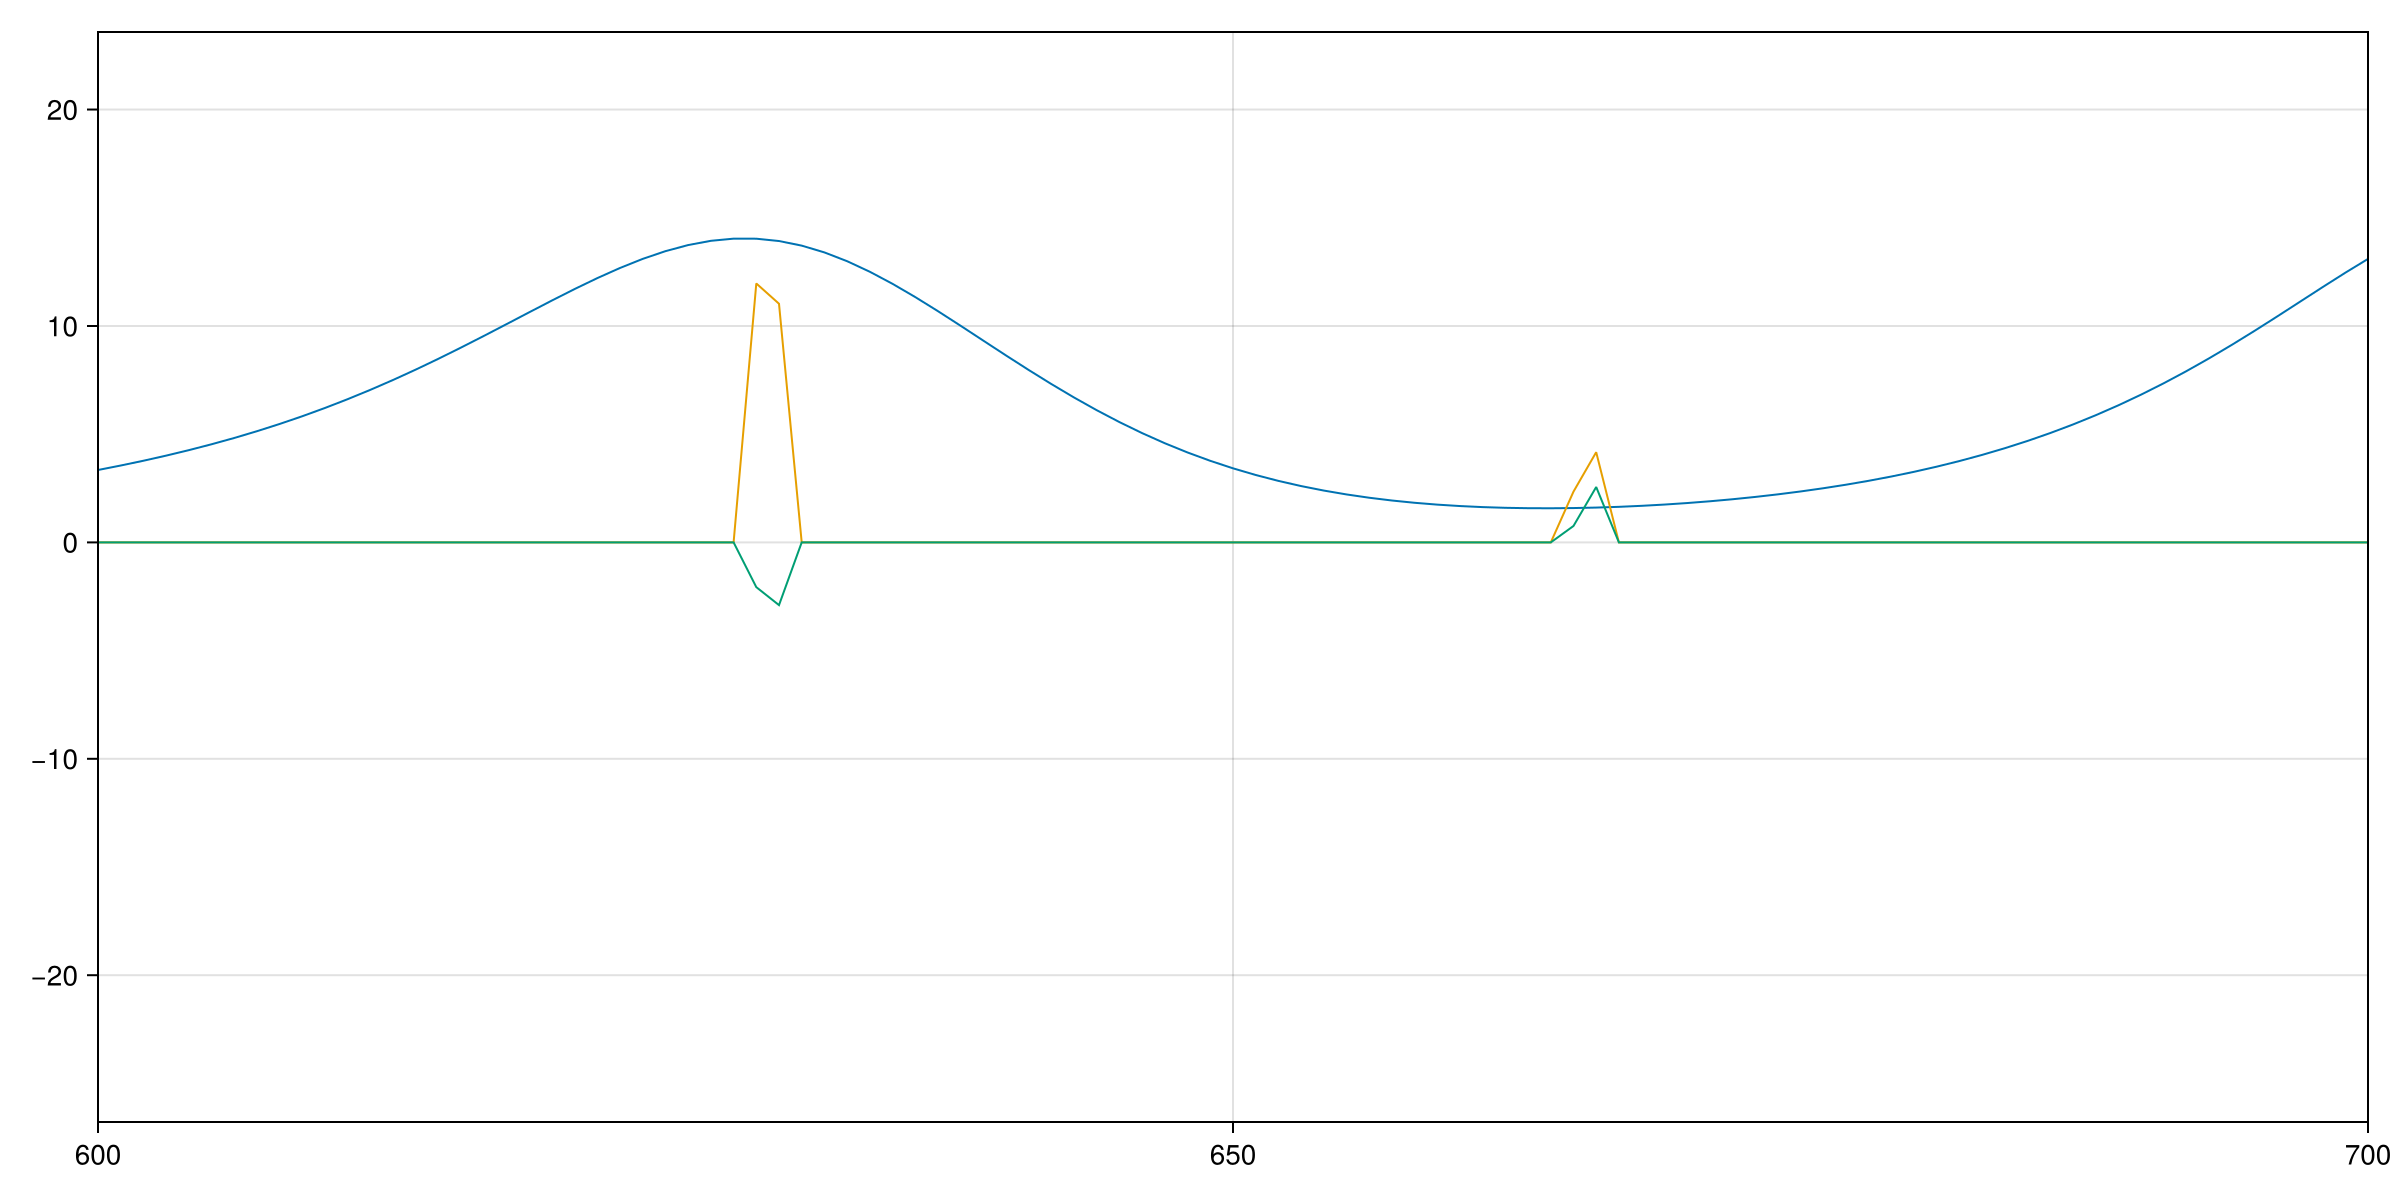

In [11]:
test_preds = lo_test + 3 * randn(length(lo_test))

test_mask = create_turning_partition_mask(lo_test, 4, 1, 1)
error = test_preds .- lo_test

fig = Figure( size = (1200,600))

ax1 = Axis(fig[1,1])
lines!(ax1, lo_test; linewidth = 1.0, color = Cycled(1))
lines!(ax1, test_preds .* test_mask; linewidth = 1.0, color = Cycled(2))
lines!(ax1, error .* test_mask; linewidth = 1.0, color = Cycled(3))

xlims!(600,700)

fig

In [12]:
part_symbols, unique_parts = create_ordinal_partition(lo_train, 4, 1, 1)

(Union{Nothing, Int64}[nothing, nothing, nothing, 1, 2, 3, 4, 5, 6, 7  …  1, 19, 14, 20, 2, 3, 4, 20, 19, 24], SubArray{Int64, 1, Matrix{Int64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}[[3, 2, 1, 4], [2, 1, 3, 4], [1, 2, 4, 3], [4, 1, 3, 2], [4, 3, 2, 1], [3, 4, 2, 1], [2, 3, 1, 4], [2, 4, 3, 1], [1, 3, 2, 4], [1, 4, 2, 3]  …  [2, 1, 4, 3], [1, 3, 4, 2], [1, 2, 3, 4], [1, 4, 3, 2], [4, 2, 1, 3], [3, 2, 4, 1], [2, 4, 1, 3], [4, 2, 3, 1], [3, 1, 2, 4], [3, 1, 4, 2]])

In [13]:
unique_parts

24-element Vector{SubArray{Int64, 1, Matrix{Int64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}:
 [3, 2, 1, 4]
 [2, 1, 3, 4]
 [1, 2, 4, 3]
 [4, 1, 3, 2]
 [4, 3, 2, 1]
 [3, 4, 2, 1]
 [2, 3, 1, 4]
 [2, 4, 3, 1]
 [1, 3, 2, 4]
 [1, 4, 2, 3]
 ⋮
 [1, 3, 4, 2]
 [1, 2, 3, 4]
 [1, 4, 3, 2]
 [4, 2, 1, 3]
 [3, 2, 4, 1]
 [2, 4, 1, 3]
 [4, 2, 3, 1]
 [3, 1, 2, 4]
 [3, 1, 4, 2]

In [15]:
lo_train_01 = vec(readdlm("../Data/lorenz_train_0_01.txt"))
lo_test_01 = vec(readdlm("../Data/lorenz_test_0_01.txt"))

lo_train_05 = vec(readdlm("../Data/lorenz_train_0_05.txt"))
lo_test_05 = vec(readdlm("../Data/lorenz_test_0_05.txt"))
;

In [16]:
length(lo_train_01)

40000

In [17]:
length(lo_train_05)

40000

In [20]:
using JSON

# Example test result
test1 = Dict(
    "results" => [1, 2, 2, 4, 6, 7, 8, 9, 9, 9],
    "parameter_a" => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "other_parameters" => Dict(
        "parameter_b" => 3,
        "parameter_c" => 0.1,
        "parameter_d" => true,
        "parameter_e" => false
    )
)

# Write to JSON
open("test1.json", "w") do f
    JSON.print(f, test1)
end

# Another example test
test2 = Dict(
    "results" => [1, 2, 3, 6, 5, 7, 8, 9, 8, 9],
    "parameter_b" => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "other_parameters" => Dict(
        "parameter_a" => 2,
        "parameter_c" => 0.1,
        "parameter_d" => true,
        "parameter_e" => false
    )
)

open("test2.json", "w") do f
    JSON.print(f, test2)
end

<!-- # Single step predictions -->